In [1]:
import pandas as pd
df =pd.read_csv("C:/Users/ASUS/OneDrive/Documents/data science/DS Assignments/Random forest/Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Preprocessing

In [2]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [3]:
df["Taxable.Income"].values

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

<Axes: xlabel='Marital.Status', ylabel='count'>

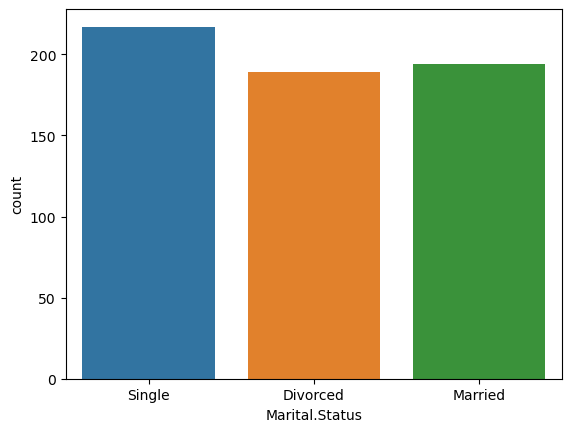

In [19]:
import seaborn as sns
sns.countplot(x = df["Marital.Status"])

<Axes: xlabel='Undergrad', ylabel='count'>

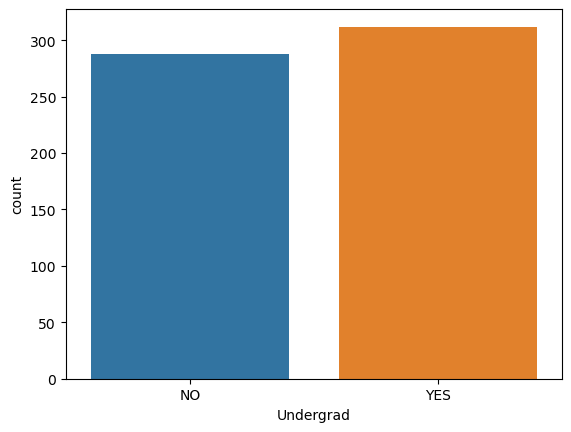

In [20]:
import seaborn as sns
sns.countplot(x = df["Undergrad"])

<Axes: xlabel='Urban', ylabel='count'>

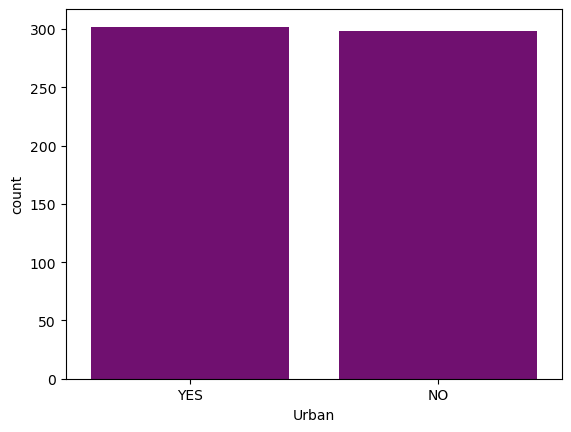

In [24]:
import seaborn as sns
sns.countplot(x = df["Urban"],color = "purple")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17948\3089647344.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t = df.groupby("Taxable.Income").sum()


<Axes: ylabel='Frequency'>

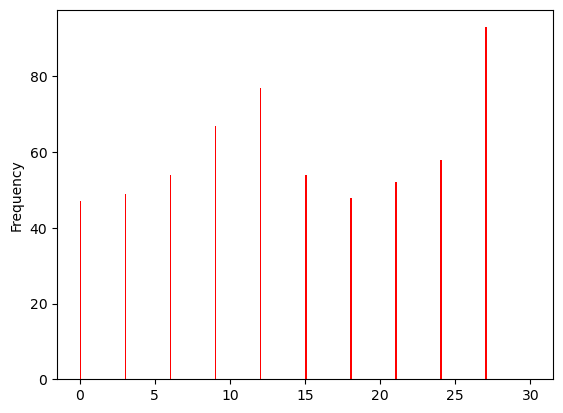

In [32]:
t = df.groupby("Taxable.Income").sum()
t["Work.Experience"].plot(kind = "hist",color = "red",width = 0.10)

In [4]:
tax_income = []
for value in df["Taxable.Income"]:
  if value <= 30000:
    tax_income.append("Risky")
  else:
    tax_income.append("Good")
df["tax_income"] = tax_income

In [5]:
x = df.drop(df.columns[[6]],axis = 1)
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
y = df["tax_income"]
y.head()

0    Good
1    Good
2    Good
3    Good
4    Good
Name: tax_income, dtype: object

## Data Transformation

In [7]:
ssx = df[["Taxable.Income","City.Population","Work.Experience"]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit_transform(ssx)
ss = pd.DataFrame(ss)
ss.columns = list(ssx)
ss.head()

,Taxable.Income,City.Population,Work.Experience
0,0.520362,-1.178521,-0.629143
1,-0.821464,0.508500,0.276370
2,-0.698292,1.033109,1.634639
3,-0.191666,1.696831,-0.063197
4,0.985129,-1.630532,1.408261


In [8]:
import warnings
with warnings.catch_warnings():
    # Setting values in-place is fine, ignore the warning in Pandas >= 1.5.0
    # This can be removed, if Pandas 1.5.0 does not need to be supported any longer.
    # See also: https://stackoverflow.com/q/74057367/859591
    warnings.filterwarnings(
        "ignore",
        category=FutureWarning,
        message=(
            ".*will attempt to set the values inplace instead of always setting a new array. "
            "To retain the old behavior, use either.*"
        ),
    )

pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_cat =df[df.columns[[0,1,5]]]
df_cat.iloc[:,0] = le.fit_transform(df_cat.iloc[:,0])
df_cat.iloc[:,1]= le.fit_transform(df_cat.iloc[:,1])
df_cat.iloc[:,2]= le.fit_transform(df_cat.iloc[:,2])
df_cat

,Undergrad,Marital.Status,Urban
0,0,2,1
1,1,0,1
2,0,1,1
3,1,2,1
4,0,1,0
...,...,...,...
595,1,0,1
596,1,0,1
597,0,0,1
598,1,1,0


In [9]:
df1 = pd.concat([ss,df_cat],axis = 1)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,0.520362,-1.178521,-0.629143,0,2,1
1,-0.821464,0.508500,0.276370,1,0,1
2,-0.698292,1.033109,1.634639,0,1,1
3,-0.191666,1.696831,-0.063197,1,2,1
4,0.985129,-1.630532,1.408261,0,1,0
...,...,...,...,...,...,...
595,0.807075,-1.390432,-0.968710,1,0,1
596,0.563672,-1.071672,-1.534655,1,0,1
597,-0.300744,0.909696,-1.761033,0,0,1
598,1.656940,1.432197,0.163181,1,1,0


In [10]:
x = df1
y =df["tax_income"]
y.head()
x.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,0.520362,-1.178521,-0.629143,0,2,1
1,-0.821464,0.508500,0.276370,1,0,1
2,-0.698292,1.033109,1.634639,0,1,1
3,-0.191666,1.696831,-0.063197,1,2,1
4,0.985129,-1.630532,1.408261,0,1,0


## Data Partition

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.2)

## RandomForest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth =5,n_estimators = 100,max_samples = 0.6,max_features = 0.7,random_state=123)
rfc.fit(x_train,y_train)
y_pred_train = rfc.predict(x_train)
print(y_pred_train)
y_pred_test = rfc.predict(x_test)
print(y_pred_test)

['Good' 'Good' 'Risky' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Risky' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Risky' 'Good' 'Risky'
 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Good' 'Risky'
 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Risky' 'Good' 'Risky' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Risky' 'Risky' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Risky'
 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Risky' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good']
['Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' '

In [14]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 1.0
The testing accuracy score is: 0.988
The Variance between train and test data is: 0.012499999999999956


## AdaBoostClassifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier
ABR = AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                        n_estimators=250,
                        learning_rate=2)

ABR.fit(x_train,y_train)
y_pred_train = ABR.predict(x_train) 
y_pred_test = ABR.predict(x_test) 
y_pred_train


F:\ANACONDA SABA\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',

In [16]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 1.0
The testing accuracy score is: 0.996
The Variance between train and test data is: 0.004166666666666652


## GradientBoostingClassifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth = 5,n_estimators = 100,learning_rate = 0.01)
gbc.fit(x_train,y_train)
y_pred_train = gbc.predict(x_train) 
y_pred_test = gbc.predict(x_test) 

In [18]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_train,y_pred_train)
print("The training accuracy score is:",acc1.round(3))
acc2 = accuracy_score(y_test,y_pred_test)
print("The testing accuracy score is:",acc2.round(3))
print("The Variance between train and test data is:",acc1-acc2)

The training accuracy score is: 1.0
The testing accuracy score is: 1.0
The Variance between train and test data is: 0.0


### From the above classifier the best classifier model is GradientBoosting Classifier with the variance between test and train data as 0 . Thus, it fits the model best avoiding overfitting and underfitting